In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tbd_eeg.data_analysis.eegutils import EEGexp

# from ipympl.backend_nbagg import Canvas
# Canvas.header_visible.default_value = False

# %matplotlib widget

# Importing an experiment in the EEGexp object

In [2]:
mouse = 'mouse569064'
expt = 'estim_vis_2021-04-08_10-28-24'
probe = 'probeF'

rec_folder = f'../tiny-blue-dot/zap-n-zip/EEG_exp/{mouse}/{expt}/experiment1/recording1/'
exp = EEGexp(rec_folder, preprocess=False, make_stim_csv=False)

Experiment type: electrical and sensory stimulation
SomnoSuite log file not found.


In [3]:
# since we record multiple data (EEG, Neuropixels etc.), metadata for all of them can be found using the ephys_params property
print('Sources of data:', exp.ephys_params.keys())
print('Metadata for the EEG recordings:')
sample_rate = exp.ephys_params['EEG']['sample_rate']
display(exp.ephys_params['EEG'])

Sources of data: dict_keys(['probeB', 'probeC', 'probeF', 'EEG'])
Metadata for the EEG recordings:


{'sample_rate': 2500,
 'num_chs': 40,
 'bit_volts': 0.19499999284744263,
 'units': 'uV',
 'continuous': '../tiny-blue-dot/zap-n-zip/EEG_exp/mouse569064/estim_vis_2021-04-08_10-28-24/experiment1/recording1/continuous/Rhythm_FPGA-159.0/continuous.dat',
 'timestamps': '../tiny-blue-dot/zap-n-zip/EEG_exp/mouse569064/estim_vis_2021-04-08_10-28-24/experiment1/recording1/continuous/Rhythm_FPGA-159.0/timestamps_master_clock.npy'}

In [4]:
# loading the EEG data
eegdata = exp.load_eegdata(return_type='pd')
eegdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
57.039895,6.630000,9.750000,3.120000,4.875000,-1.170000,-0.975000,-5.655000,0.390000,-1.950000,-37.829999,-18.719999,-8.385000,16.184999,-7.410000,18.524999,27.104999,4.485000,8.190000,-27.104999,-25.154999,10.530000,-18.524999,-13.649999,-17.159999,-0.585000,-0.585000,-2.340000,0.585000,-5.850000,-2.145000
57.040295,-20.669999,-26.324999,-5.265000,-29.444999,-23.204999,-22.034999,-34.709999,-22.814999,-22.424999,-64.544998,-40.949998,-24.569999,1.170000,-1.365000,19.499999,36.269999,35.294999,29.054999,1.950000,4.095000,-19.694999,6.435000,6.630000,-37.634999,-7.800000,3.900000,3.510000,6.045000,6.045000,7.215000
57.040695,-2.340000,11.115000,25.934999,1.755000,8.970000,14.234999,1.560000,8.385000,3.705000,-47.774998,-26.909999,-6.045000,19.304999,3.705000,25.739999,24.959999,46.799998,14.624999,10.140000,6.045000,13.065000,15.989999,25.544999,15.599999,26.714999,34.319999,29.444999,27.884999,29.054999,24.959999
57.041095,-27.299999,-15.599999,6.240000,-29.054999,-25.934999,-9.945000,-34.904999,-10.335000,-7.995000,-64.349998,-37.439999,-18.329999,3.705000,-11.895000,15.404999,-29.249999,-15.209999,-35.489999,-38.999999,-32.564999,-31.784999,-8.190000,2.730000,6.045000,14.039999,23.789999,26.129999,23.594999,22.424999,24.179999
57.041495,-6.045000,3.510000,18.524999,-12.870000,-7.605000,-1.365000,-16.184999,-11.310000,-19.889999,-64.349998,-54.989998,-38.609999,-27.494999,-15.599999,-9.165000,32.564999,48.164998,20.669999,18.719999,23.204999,15.404999,28.079999,27.104999,14.624999,23.984999,26.714999,34.709999,31.979999,35.879999,42.704998


In [5]:
# loading the stimulus table
stim_log = pd.read_csv(exp.stimulus_log_file)
stim_log['sweep'] = stim_log.sweep.map({0:'pre', 1:'iso', 2:'recovery_1', 3:'recovery_2'})
stim_log

,stim_type,parameter,onset,offset,duration,sweep
0,biphasic,40,375.08634,375.08674,0.00040,pre
1,biphasic,15,378.61936,378.61976,0.00040,pre
2,biphasic,40,382.68098,382.68138,0.00040,pre
3,biphasic,60,387.06326,387.06366,0.00040,pre
4,biphasic,60,391.23287,391.23327,0.00040,pre
...,...,...,...,...,...,...
1915,circle,white,10116.43151,10116.68113,0.24962,recovery_2
1916,circle,white,10120.88524,10121.13486,0.24962,recovery_2
1917,circle,white,10125.03871,10125.30499,0.26628,recovery_2
1918,circle,white,10129.50914,10129.75872,0.24958,recovery_2


## MultiIndex and pandas groupby
Here we will add useful stimulus information to the "eegdata" dataframe

In [6]:
# first let's align the 'onset' column of stim_log frame with the eegdata timestamps

# store the actual order of stimuli given in the inddex of stim_log into a separate column
stim_log['stim_id'] = stim_log.index.astype(int)

# set onset time as the index and remove columns that are not useful
stim_log_1 = stim_log.set_index('onset').drop(['duration', 'offset'], axis=1)

# align onset times with timestamps in eegdata
# this line will reindex stim_log so that the index matches that of eegdata
# and assign the values from stim_data corresponding to the nearest previous onset time (see method='ffill'); also we will forward-fill only upto 5s
stim_log_1 = stim_log_1.reindex(eegdata.index, method='ffill', limit=int(sample_rate*5)).dropna()

stim_log_1.head(5)

,stim_type,parameter,sweep,stim_id
375.086611,biphasic,40,pre,0.0
375.087011,biphasic,40,pre,0.0
375.087411,biphasic,40,pre,0.0
375.087811,biphasic,40,pre,0.0
375.088211,biphasic,40,pre,0.0


In [7]:
# first include the 'onset' or index of stim_log as a data column
stim_log_1 = stim_log_1.rename_axis('rec_time').reset_index()
display(stim_log_1.head(3))
print('\n\n')

# the rec_time gives actual time for each recorded eeg sample,
# but we would also like the relative time from the stimulus
# we can add that as follows

# this function takes a dataframe df and adds a 'time' column to it
# which is simply the time relative to the stimulus onset
def _reset_time(df):
    df['time'] = (df['rec_time'] - df['rec_time'].iloc[0]).round(4)
    return df
# for each stim_id (ie each stimulus) we want to apply the above
# function. This can be done by 'grouping' the dataframe by stim_id
# and 'applying' the function to each group as follows:
stim_log_1 = stim_log_1.groupby('stim_id').apply(_reset_time)

stim_log_1

,rec_time,stim_type,parameter,sweep,stim_id
0,375.086611,biphasic,40,pre,0.0
1,375.087011,biphasic,40,pre,0.0
2,375.087411,biphasic,40,pre,0.0


,rec_time,stim_type,parameter,sweep,stim_id,time
0,375.086611,biphasic,40,pre,0.0,0.0000
1,375.087011,biphasic,40,pre,0.0,0.0004
2,375.087411,biphasic,40,pre,0.0,0.0008
3,375.087811,biphasic,40,pre,0.0,0.0012
4,375.088211,biphasic,40,pre,0.0,0.0016
...,...,...,...,...,...,...
19486510,10139.227925,circle,white,recovery_2,1919.0,4.9980
19486511,10139.228325,circle,white,recovery_2,1919.0,4.9984
19486512,10139.228725,circle,white,recovery_2,1919.0,4.9988
19486513,10139.229125,circle,white,recovery_2,1919.0,4.9992


See how for each stim_id, the time column ranges from 0 to 5 (or less, if there are fewer samples in that stim), with regularly spaced times. This is very useful later on.

In [8]:
# set stim_log_1 as the index for eegdata

# since we dropped some unused timepoints from stim_log above
# we have to drop those points form eegdata as well
eegdata_1 = eegdata.loc[stim_log_1.rec_time]

# and then set the stim_log_1 dataframe as the index of eegdata
eegdata_1.index = pd.MultiIndex.from_frame(stim_log_1)
eegdata_1

,,,,,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
rec_time,stim_type,parameter,sweep,stim_id,time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
375.086611,biphasic,40,pre,0.0,0.0000,-335.789988,-301.469989,-76.634997,-71.174997,-23.009999,-28.469999,18.914999,-608.789978,-649.349976,6.045000,-194.414993,-538.784980,-0.390000,-1247.219954,-175.694994,141.374995,75.464997,56.549998,77.219997,22.229999,41.339998,-61.229998,-34.709999,17.549999,-63.959998,-53.819998,-60.839998,-58.304998,-54.989998,-55.379998
375.087011,biphasic,40,pre,0.0,0.0004,80.534997,87.944997,-62.594998,86.384997,108.029996,22.424999,76.634997,83.849997,59.474998,-8.775000,61.814998,80.729997,73.709997,171.404994,174.524994,126.554995,62.984998,51.869998,53.039998,2.730000,26.519999,-81.314997,-66.494998,-23.009999,-84.824997,-84.239997,-86.774997,-84.824997,-82.874997,-78.584997
375.087411,biphasic,40,pre,0.0,0.0008,67.859998,60.449998,-44.264998,63.764998,75.464997,14.039999,63.764998,64.934998,37.049999,16.574999,63.764998,98.279996,62.594998,141.179995,162.824994,145.274995,91.454997,70.979997,90.089997,34.319999,70.004997,-45.044998,-19.694999,1.755000,-50.114998,-37.049999,-39.974999,-37.634999,-34.904999,-32.369999
375.087811,biphasic,40,pre,0.0,0.0012,69.419997,70.004997,-39.779999,75.074997,82.874997,21.449999,58.499998,77.414997,47.969998,50.894998,88.529997,123.434995,79.754997,143.909995,165.749994,132.404995,72.734997,43.874998,59.669998,8.775000,21.644999,-79.364997,-53.429998,10.335000,-62.204998,-42.704998,-57.524998,-51.284998,-59.084998,-62.009998
375.088211,biphasic,40,pre,0.0,0.0016,80.339997,94.769997,-31.784999,98.084996,121.289996,48.944998,97.304996,76.439997,50.114998,16.769999,79.364997,119.144996,76.829997,152.099994,167.699994,132.404995,72.929997,48.359998,60.644998,8.775000,74.294997,-66.884998,-46.994998,-3.315000,-66.884998,-62.009998,-61.619998,-56.549998,-53.429998,-61.619998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139.227925,circle,white,recovery_2,1919.0,4.9980,52.649998,35.684999,7.605000,49.919998,51.089998,40.754999,54.404998,58.109998,55.574998,71.564997,92.234997,52.454998,49.529998,55.184998,25.349999,-6.045000,59.669998,35.294999,66.494998,72.149997,158.729994,74.294997,79.949997,97.889996,62.789998,73.319997,67.469998,58.889998,71.369997,65.129998
10139.228325,circle,white,recovery_2,1919.0,4.9984,51.674998,39.584999,24.179999,56.744998,51.089998,44.849998,59.084998,61.034998,52.259998,74.489997,91.649997,52.259998,46.994998,30.809999,6.630000,1.950000,55.574998,45.239998,75.074997,73.709997,158.339994,68.054998,71.369997,93.599997,56.354998,59.084998,54.794998,45.629998,53.234998,55.769998
10139.228725,circle,white,recovery_2,1919.0,4.9988,39.974999,30.419999,7.605000,49.529998,41.729998,41.729998,57.524998,53.819998,42.899998,74.489997,84.239997,53.234998,46.214998,36.854999,12.675000,0.780000,63.764998,49.334998,84.824997,80.534997,134.549995,82.679997,92.234997,88.529997,70.394997,74.099997,70.589997,66.104998,72.734997,73.319997


In [9]:
# using the multiindex eegdata dataframe for quick manupulation

# you can select certain conditions using xs:
# eegdata.xs(40, level='parameter') # selects the subset of data for which parameter==40
# eegdata.xs(2, level='sweep') # selects the subset of data for which sweep==2 etc

# you can group by different parameters (or their combinations) and compute mean, SD etc
erp = eegdata_1.groupby(level=['stim_type', 'parameter', 'sweep', 'time']).mean()
erp_sd = eegdata_1.groupby(level=['stim_type', 'parameter', 'sweep', 'time']).std()

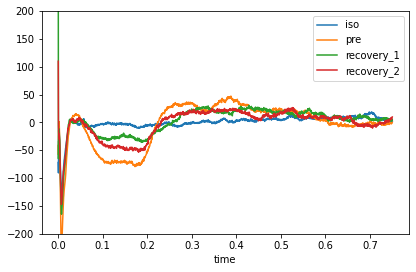

In [13]:
stim_type = 'biphasic'
parameter = '40'

f, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
erp.loc[(stim_type, parameter)].groupby('sweep').apply(
    lambda df: df[0]
    .droplevel('sweep')[:0.75]
    .plot(ax=ax, label=df.name)
);
ax.legend()
ax.set_ylim(-200, 200);

## If you want to include some pre-stimulus signal in your windows

In [14]:
# including some pre-stimulus signal
# the pipeline below is identical to the previous section
# the only changes are as indicated (3 lines)
pre_stim_win_size = 0.3
response_win_size = 0.75

def _reset_time(df):
    df['time'] = (df['rec_time'] - df['rec_time'].iloc[0] - pre_stim_win_size).round(4) # <--CHANGED
    return df

stim_log = pd.read_csv(exp.stimulus_log_file)
stim_log['sweep'] = stim_log.sweep.map({0:'pre', 1:'iso', 2:'recovery_1', 3:'recovery_2'})
stim_log['stim_id'] = stim_log.index.astype(int)
stim_log['onset'] = stim_log['onset'] - pre_stim_win_size # <--CHANGED

stim_log_2 = (
    stim_log
    .set_index('onset')
    .drop(['duration', 'offset'], axis=1)
    .reindex(
        eegdata.index, method='ffill',
        limit=int(sample_rate*(pre_stim_win_size+response_win_size)) # <--CHANGED
    )
    .dropna()
    .rename_axis('rec_time')
    .reset_index()
    .groupby('stim_id')
    .apply(_reset_time)
)

eegdata_2 = eegdata.loc[stim_log_2.rec_time]
eegdata_2.index = pd.MultiIndex.from_frame(stim_log_2)
eegdata_2

,,,,,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
rec_time,stim_type,parameter,sweep,stim_id,time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
374.786609,biphasic,40,pre,0.0,-0.3000,0.000000,-9.750000,8.970000,-5.850000,-23.009999,-1.170000,-4.485000,-3.705000,-16.379999,-96.524996,-84.239997,-151.904994,-164.969994,-90.479997,-188.369993,-273.389990,-566.084979,-230.099992,-497.054982,-149.759995,-333.449988,-32.564999,-51.479998,-167.504994,-6.240000,-7.410000,-11.115000,1.755000,-7.215000,-1.560000
374.787009,biphasic,40,pre,0.0,-0.2996,-17.939999,-26.324999,12.090000,-27.689999,-38.609999,-16.769999,-19.889999,-22.034999,-21.644999,-106.859996,-94.184997,-158.924994,-175.499994,-108.419996,-193.829993,-266.564990,-569.789979,-236.144991,-510.314981,-157.949994,-340.274988,-40.364999,-53.039998,-176.669994,-10.725000,-12.675000,-4.680000,3.510000,-1.170000,0.195000
374.787409,biphasic,40,pre,0.0,-0.2992,-18.134999,-29.054999,4.875000,-29.249999,-44.264998,-19.694999,-29.834999,-22.034999,-29.054999,-113.879996,-85.214997,-158.144994,-163.994994,-88.139997,-191.684993,-296.594989,-601.184978,-257.399991,-534.884980,-178.619993,-368.549986,-61.229998,-80.144997,-177.449993,-19.304999,-21.059999,-21.839999,-8.385000,-21.839999,-21.644999
374.787809,biphasic,40,pre,0.0,-0.2988,-19.694999,-25.739999,2.340000,-27.884999,-42.899998,-15.599999,-21.839999,-26.519999,-25.349999,-99.839996,-86.384997,-155.219994,-173.159994,-108.224996,-204.944992,-287.819989,-583.439979,-239.459991,-520.649981,-163.994994,-327.794988,-46.214998,-63.179998,-195.974993,-16.964999,-14.624999,-17.159999,-6.825000,-13.455000,-16.379999
374.788209,biphasic,40,pre,0.0,-0.2984,-15.599999,-20.084999,17.354999,-16.184999,-36.269999,-9.360000,-9.360000,-12.090000,-20.669999,-91.649997,-77.219997,-153.854994,-166.724994,-100.424996,-197.729993,-288.599989,-582.659979,-232.829991,-504.464981,-161.459994,-327.404988,-38.024999,-56.939998,-166.919994,1.365000,-2.145000,-2.730000,6.630000,0.585000,-1.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134.977912,circle,white,recovery_2,1919.0,0.7480,155.024994,166.334994,171.794994,160.094994,184.469993,202.409993,168.284994,184.664993,209.234992,77.609997,153.269994,167.114994,224.444992,168.284994,188.564993,163.604994,70.004997,198.119993,56.354998,175.109994,127.139995,215.084992,195.389993,141.764995,196.364993,161.654994,156.194994,165.554994,160.484994,157.754994
10134.978312,circle,white,recovery_2,1919.0,0.7484,143.324995,151.904994,162.629994,147.419995,165.749994,182.909993,155.414994,176.084994,198.509993,77.609997,145.664995,154.439994,215.084992,152.294994,176.474994,181.154993,86.969997,224.834992,71.174997,185.834993,97.109996,221.129992,194.609993,132.989995,175.109994,145.079995,148.004995,154.634994,149.369995,152.294994
10134.978712,circle,white,recovery_2,1919.0,0.7488,112.904996,126.944995,143.909995,124.019995,139.619995,167.309994,131.234995,155.609994,178.814993,52.649998,139.034995,150.344994,213.134992,165.554994,190.904993,167.894994,72.929997,212.354992,59.279998,172.574994,72.149997,210.794992,191.489993,120.704996,181.544993,153.854994,148.784995,154.634994,150.734994,152.684994


In [15]:
erp = eegdata_2.groupby(level=['stim_type', 'parameter', 'sweep', 'time']).mean()
erp_sd = eegdata_2.groupby(level=['stim_type', 'parameter', 'sweep', 'time']).std()

In [22]:
parameters = erp.index.to_frame(index=False).apply(lambda r: (r.stim_type, r.parameter), axis=1).unique()
parameters

array([('biphasic', '15'), ('biphasic', '40'), ('biphasic', '60'),
       ('circle', 'white')], dtype=object)

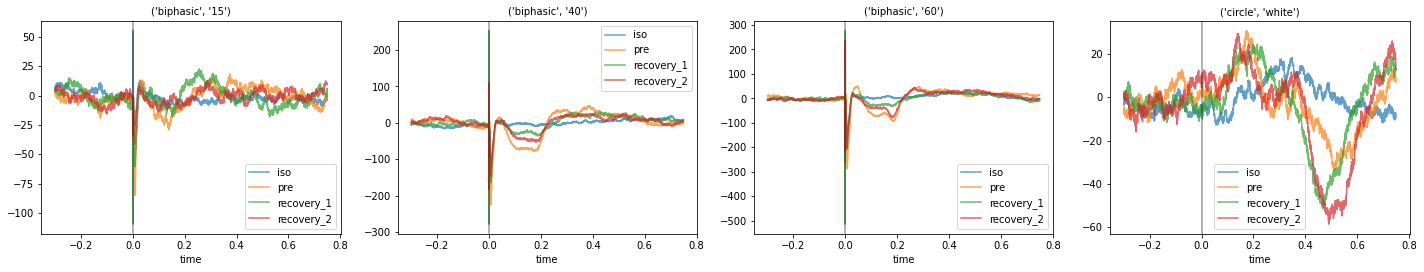

In [26]:
f, axes = plt.subplots(1, 4, figsize=(20, 4), tight_layout=True)

for ax, p in zip(axes, parameters):
    erp.loc[p].groupby('sweep').apply(
        lambda df: df[0]
        .droplevel('sweep')#[:0.75]
        .plot(ax=ax, label=df.name, alpha=0.7)
    );
    ax.legend()
#     ax.set_ylim(-200, 200)
    ax.set_title(p)
    ax.axvline(0, c='k', alpha=0.4)

# Importing experiment metadata from a shared Google sheet

In [6]:
# accessing the Google sheet with experiment metadata in python
# setting up the permissions:
# 1. install gspread (pip install gspread / conda install gspread)
# 2. copy the service_account.json file to '~/.config/gspread/service_account.json'
# 3. run the following:
import gspread
_gc = gspread.service_account() # need a key file to access the account (step 2)
_sh = _gc.open('Zap_Zip-log_exp') # open the spreadsheet
_df = pd.DataFrame(_sh.sheet1.get()) # load the first worksheet
gmetadata = _df.T.set_index(0).T # put it in a nicely formatted dataframe

gmetadata

ModuleNotFoundError: No module named 'gspread'